# Train model on a balanced dataset


### Build a logistic regression model

In [133]:
#Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [134]:
#training model fuctions
def Sigmoid(z):
    return 1.0/(1+np.exp(-z))
def Predict(x,w):
    z = np.dot(x, w)
    return Sigmoid(z)
def cost_function(features, labels, weights):
    n = len(labels)
    predictions = Predict(features, weights)
    cost_class1 = -np.log(predictions)*labels
    cost_class2 = -np.log(1-predictions)*(1-labels)
    cost = cost_class1 + cost_class2
    return cost.sum()/n
def update_weight(features, labels, weights, learning_rate):
    n = len(labels)
    predictions = Predict(features, weights)
    gradient = np.dot(features.T, predictions-labels)
    gradient /= n
    gradient *= learning_rate
    weights = weights - gradient
    return weights
def train(features, labels, weights, learning_rate, iter):
    cost_history = []
    for i in range(iter):
        weights = update_weight(features, labels, weights, learning_rate)
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
    return weights, cost_history
#Normalized data function
def Scale_data(data):
    data.age=scale(data.age)
    data.trestbps=scale(data.trestbps)
    data.chol=scale(data.chol)
    data.thalach=scale(data.thalach)
    data.oldpeak=scale(data.oldpeak)
    return data
def Predict_target(predictions):
    for i in range(len(predictions)):
        if predictions[i] >= 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
    return predictions

### Generate dataset

In [135]:
#Generate data
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [136]:
data.shape

(1025, 14)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


[Text(0.5, 1.0, 'Count of two class')]

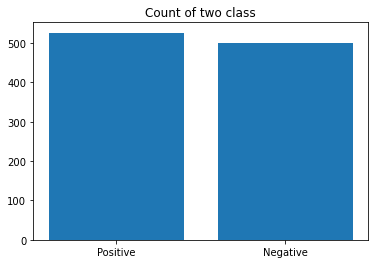

In [138]:
target_values = {"Positive": len(data.loc[data.target==1]), "Negative": len(data.loc[data.target==0])}
fig, ax = plt.subplots()
ax.bar(target_values.keys(), target_values.values())
ax.set(title="Count of two class")

In [139]:
#Split data train and data test: 70%(718/1025) values for training and 30%(307/1025) values for testing
features = data.drop(['target'], axis=1)
features["bias"] = np.ones(1025)
positive = data.loc[data.target==1]
negative = data.loc[data.target==0]
#data for training:
data_train = features[:718]
labels_of_datatrain = data[:718].target.to_numpy()
#data for testing
data_test = features[718:]
labels_of_datatest = data[718:].target.to_numpy()

### Train model and predict 

C:\Users\TechCare\AppData\Local\Temp\ipykernel_8476\3634651129.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age=scale(data.age)
C:\Users\TechCare\AppData\Local\Temp\ipykernel_8476\3634651129.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.trestbps=scale(data.trestbps)
C:\Users\TechCare\AppData\Local\Temp\ipykernel_8476\3634651129.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

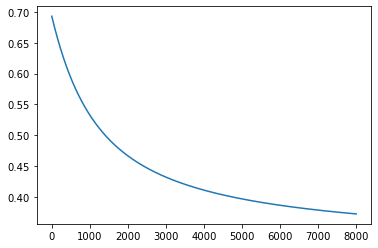

In [140]:
weights = np.zeros([14], float)
cost_history = []
weights, cost_history = train(Scale_data(features[:718]).to_numpy(), labels_of_datatrain, weights, 0.001, 8000)
#Visualize cost history 
plt.plot(cost_history)

C:\Users\TechCare\AppData\Local\Temp\ipykernel_8476\3634651129.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age=scale(data.age)
C:\Users\TechCare\AppData\Local\Temp\ipykernel_8476\3634651129.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.trestbps=scale(data.trestbps)
C:\Users\TechCare\AppData\Local\Temp\ipykernel_8476\3634651129.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

[Text(0.5, 1.0, 'Predictions of data train')]

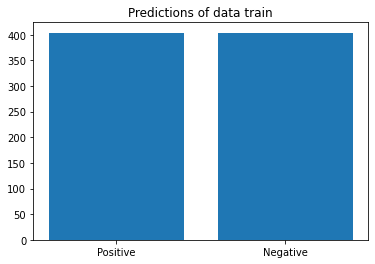

In [141]:
### Predictions of data train
predictions = Predict(Scale_data(features[:718]).to_numpy(), weights)
predictions = Predict_target(predictions)
target_values = {"Positive": np.count_nonzero(predictions==1), "Negative": np.count_nonzero(predictions==1)}
fig, ax = plt.subplots()
ax.bar(target_values.keys(), target_values.values())
ax.set(title="Predictions of data train")

C:\Users\TechCare\AppData\Local\Temp\ipykernel_8476\3634651129.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age=scale(data.age)
C:\Users\TechCare\AppData\Local\Temp\ipykernel_8476\3634651129.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.trestbps=scale(data.trestbps)
C:\Users\TechCare\AppData\Local\Temp\ipykernel_8476\3634651129.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

[Text(0.5, 1.0, 'Predictions of data test')]

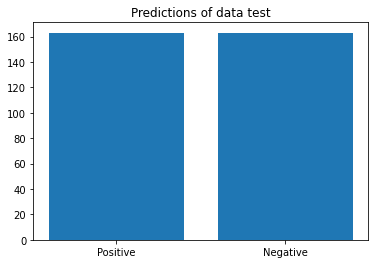

In [142]:
#Predictions of data test
predictions_of_datatest = Predict(Scale_data(data_test).to_numpy(), weights)
predictions_of_datatest = Predict_target(predictions_of_datatest)
target_values = {"Positive": np.count_nonzero(predictions_of_datatest==1), "Negative": np.count_nonzero(predictions_of_datatest==1)}
fig, ax = plt.subplots()
ax.bar(target_values.keys(), target_values.values())
ax.set(title="Predictions of data test")

### Visualize confusion matrix and calculate evaluation metrics

In [143]:
def Confusion_matrix(predictions, labels):
    True_Pos = True_Neg = False_Neg = False_Pos = 0
    for i in range(len(labels)):
        if predictions[i]==labels[i]==1:
            True_Pos+=1
        elif predictions[i]==1 and labels[i]==0:
            False_Pos+=1
        elif predictions[i]==0 and labels[i]==1:
            False_Neg+=1
        elif predictions[i]==labels[i]==0:
            True_Neg+=1
    return True_Pos, True_Neg, False_Neg, False_Pos
def Visualize_confusion_matrix(Confusion_matrix):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(Confusion_matrix, cmap=plt.cm.Greens, alpha=0.3)
    for i in range(Confusion_matrix.shape[0]):
        for j in range(Confusion_matrix.shape[1]):
            ax.text(x=j, y=i,s=Confusion_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

In [144]:
def Evaluation_metrics(True_Pos, True_Neg, False_Neg, False_Pos):
    accuracy =(True_Pos+True_Neg)/(True_Pos+ True_Neg+ False_Neg+ False_Pos)
    precision = True_Pos/(True_Pos+False_Pos)
    recall = True_Pos/(True_Pos+False_Neg)
    F1_score = (2*precision*recall)/(precision+recall)
    return accuracy, precision, recall, F1_score

In [145]:
True_Pos_1, True_Neg_1, False_Neg_1, False_Pos_1 = Confusion_matrix(predictions, labels_of_datatrain)
accuracy_1, precision_1, recall_1, F1_score_1 = Evaluation_metrics(True_Pos_1, True_Neg_1, False_Neg_1, False_Pos_1)

True_Pos_2, True_Neg_2, False_Neg_2, False_Pos_2 = Confusion_matrix(predictions_of_datatest, labels_of_datatest)
accuracy_2, precision_2, recall_2, F1_score_2 = Evaluation_metrics(True_Pos_2, True_Neg_2, False_Neg_2, False_Pos_2)

In [146]:
n1_pos = len(data[:718].loc[data.target==1])
n1_neg = len(data[:718].loc[data.target==0])
n2_pos = len(data[718:].loc[data.target==1])
n2_neg = len(data[718:].loc[data.target==0])
Conf_matrix_2 = np.array([[round(True_Neg_2/n2_neg,2),round(False_Pos_2/n2_neg,2)],[round(False_Neg_2/n2_pos,2), round(True_Pos_2/n2_pos,2)]])
Conf_matrix_1 = np.array([[round(True_Neg_1/n1_neg,2),round(False_Pos_1/n1_neg,2)],[round(False_Neg_1/n1_pos,2), round(True_Pos_1/n1_pos,2)]])

### Evaluation metrics of data train

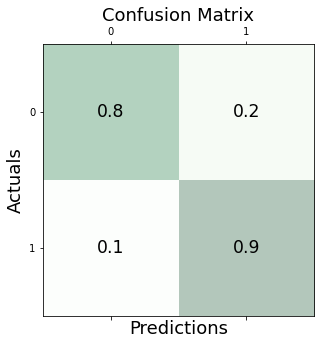

In [147]:

Visualize_confusion_matrix(Conf_matrix_1)

In [148]:
accuracy_1, precision_1, recall_1, F1_score_1

(0.8495821727019499,
 0.8267326732673267,
 0.8978494623655914,
 0.8608247422680412)

### Evaluation metrics of data test

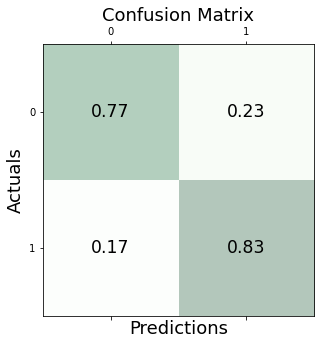

In [149]:
Visualize_confusion_matrix(Conf_matrix_2)

In [150]:
accuracy_2, precision_2, recall_2, F1_score_2

(0.8013029315960912, 0.7852760736196319, 0.8311688311688312, 0.807570977917981)